In [1]:
from embedding_prediction_helpers import *

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
interaction_table

,query_gene,array_gene,gi_score
0,YAL001C,YBL023C,-0.0348
1,YAL001C,YBL026W,-0.3529
2,YAL001C,YBL076C,-0.0250
3,YAL001C,YBL097W,-0.0808
4,YAL001C,YBR029C,-0.1173
...,...,...,...
1122249,YPR202W,YOR262W,-0.1490
1122250,YPR202W,YPL007C,-0.0572
1122251,YPR202W,YPL076W,0.0695
1122252,YPR202W,YPL169C,0.0567


## Used Embeddings : DNALM
- sequence features
- lm_3utr_emb
- lm_5utr_emb
- protein embeddings


In [ ]:
embeddings = pd.read_csv('../../extracted_data/yeast_emb_only_embeddings.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')
embeddings

,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,ACG,...,LM_5UTR_758,LM_5UTR_759,LM_5UTR_760,LM_5UTR_761,LM_5UTR_762,LM_5UTR_763,LM_5UTR_764,LM_5UTR_765,LM_5UTR_766,LM_5UTR_767
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,0.011774,...,-0.078495,-0.101951,-0.451596,0.140201,-0.027987,-0.139936,0.119334,-0.009675,0.035513,-0.042870
YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,0.000000,...,-0.036358,-0.086898,-0.285149,0.175611,0.077306,-0.061331,0.043992,0.006744,-0.069993,-0.174272
YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,0.013953,...,-0.075972,-0.245783,-0.237227,0.035347,0.030442,-0.027595,0.166694,0.106680,0.595686,0.108673
YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,0.010101,...,0.041582,-0.064832,-0.376715,0.091384,0.042122,-0.061658,0.052838,0.059197,-0.438873,-0.127666
YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,0.007722,...,-0.040703,-0.020197,-0.345180,0.086169,0.088264,-0.025787,0.143896,-0.037077,-0.682068,-0.134648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,0.036697,...,-0.069516,-0.091421,-0.402476,0.095457,0.023955,-0.072979,-0.082304,0.072628,-0.665834,0.037950
YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,0.005348,...,-0.014195,-0.102008,-0.424302,0.133435,0.087042,-0.024667,0.205772,0.009731,-0.687237,0.048592
YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,0.013605,...,0.052901,-0.037409,-0.385326,0.083647,0.060815,-0.034371,0.054171,0.069161,-0.484573,-0.094109


In [ ]:
X, y = preprocess_data(interaction_table, embeddings)

## Linear Regression

R2:  -4.615030205627798
RMSE: 0.31121282546792217


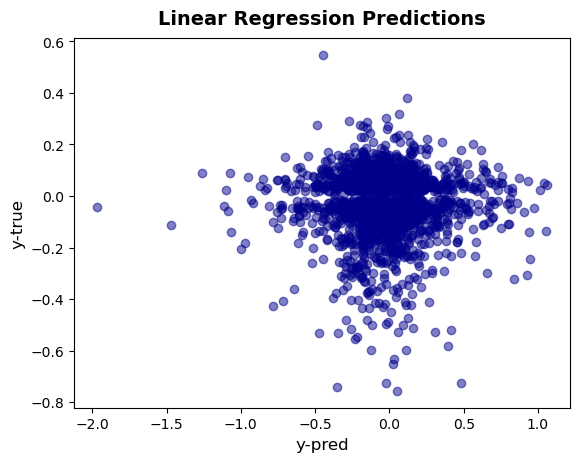

In [ ]:
run_Linear_Regression(X, y, "darkblue")

0.8246528686291844


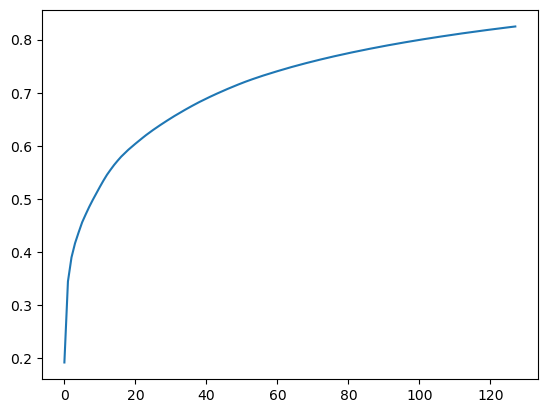

In [ ]:
X_PCA = run_PCA(X)

## Linear Regression with PCA

R2:  0.00164252573630419
RMSE: 0.13122738508396256


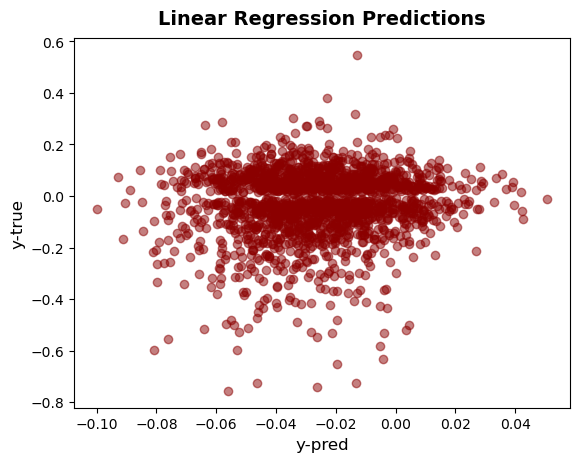

In [ ]:
run_Linear_Regression(X_PCA, y, "darkred")

## XGBoost

XGBoost R² score: -0.048
XGBoost RMSE: 0.135


<Figure size 1000x600 with 0 Axes>

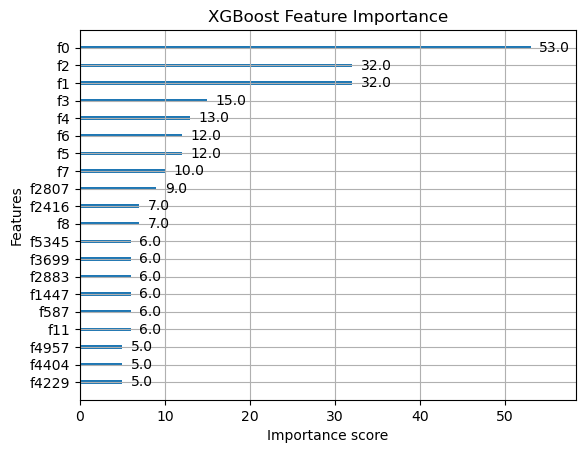

In [ ]:
run_XGBoost(X, y)

## RandomForests

Random Forest R² score: -0.001
Random Forest RMSE: 0.131


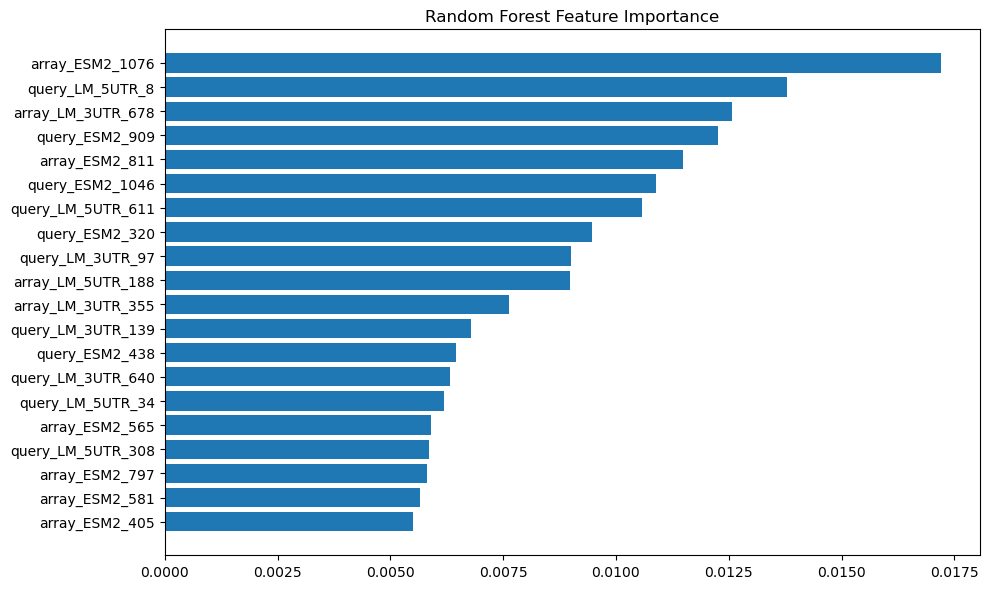

In [ ]:
run_Random_Forest(X, y, embeddings)